In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [25]:
!pip install sklearn

     |████████████████████████████████| 26.7 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 3.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=683396dc289c1bcc41cc59dad0b7748afb8f5291702cd6a6727a65dc6a8f5c6e
  Stored in directory: /home/kavads/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [7]:
df = pd.read_csv('./appC/APPENC01.txt', sep='\s+', header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0


In [51]:
df.shape

(113, 12)

In [9]:
cols = ['id','len_stay','age','inf_rsk','rt_cult_ratio','rt_xray','beds','med_sch_affl','reg','avg_daily_cen','num_nurses','avl_fac_ser']
df.columns = cols

In [10]:
df.head()

,id,len_stay,age,inf_rsk,rt_cult_ratio,rt_xray,beds,med_sch_affl,reg,avg_daily_cen,num_nurses,avl_fac_ser
0,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0


In [11]:
df.set_index('id')

,len_stay,age,inf_rsk,rt_cult_ratio,rt_xray,beds,med_sch_affl,reg,avg_daily_cen,num_nurses,avl_fac_ser
id,,,,,,,,,,,
1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0
...,...,...,...,...,...,...,...,...,...,...,...
109,11.80,53.8,5.7,9.1,116.9,571,1,2,441,469,62.9
110,9.50,49.3,5.8,42.0,70.9,98,2,3,68,46,22.9
111,7.70,56.9,4.4,12.2,67.9,129,2,4,85,136,62.9


In [12]:
df.describe()

,id,len_stay,age,inf_rsk,rt_cult_ratio,rt_xray,beds,med_sch_affl,reg,avg_daily_cen,num_nurses,avl_fac_ser
count,113.00000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,57.00000,9.648319,53.231858,4.354867,15.792920,81.628319,252.168142,1.849558,2.362832,191.371681,173.247788,43.159292
std,32.76431,1.911456,4.461607,1.340908,10.234707,19.363826,192.842687,0.359097,1.009437,153.759564,139.265390,15.200861
min,1.00000,6.700000,38.800000,1.300000,1.600000,39.600000,29.000000,1.000000,1.000000,20.000000,14.000000,5.700000
25%,29.00000,8.340000,50.900000,3.700000,8.400000,69.500000,106.000000,2.000000,2.000000,68.000000,66.000000,31.400000
50%,57.00000,9.420000,53.200000,4.400000,14.100000,82.300000,186.000000,2.000000,2.000000,143.000000,132.000000,42.900000
75%,85.00000,10.470000,56.200000,5.200000,20.300000,94.100000,312.000000,2.000000,3.000000,252.000000,218.000000,54.300000
max,113.00000,19.560000,65.900000,7.800000,60.500000,133.500000,835.000000,2.000000,4.000000,791.000000,656.000000,80.000000


In [17]:
correl = df.corr()

In [18]:
type(correl)

pandas.core.frame.DataFrame

In [21]:
correl = correl.iloc[1:,1:]

In [23]:
correl

,len_stay,age,inf_rsk,rt_cult_ratio,rt_xray,beds,med_sch_affl,reg,avg_daily_cen,num_nurses,avl_fac_ser
len_stay,1.000000,0.188914,0.533444,0.326684,0.382482,0.409265,-0.296951,-0.492130,0.473885,0.340367,0.355538
age,0.188914,1.000000,0.001093,-0.225847,-0.018855,-0.058823,0.145126,-0.020432,-0.054775,-0.082945,-0.040451
inf_rsk,0.533444,0.001093,1.000000,0.559159,0.453392,0.359770,-0.233030,-0.192281,0.381411,0.393981,0.412601
rt_cult_ratio,0.326684,-0.225847,0.559159,1.000000,0.424962,0.139725,-0.242744,-0.308278,0.142948,0.198900,0.185131
rt_xray,0.382482,-0.018855,0.453392,0.424962,1.000000,0.045820,-0.086697,-0.296344,0.062914,0.077381,0.111928
beds,0.409265,-0.058823,0.359770,0.139725,0.045820,1.000000,-0.591180,-0.105627,0.980998,0.915504,0.794524
med_sch_affl,-0.296951,0.145126,-0.233030,-0.242744,-0.086697,-0.591180,1.000000,0.102668,-0.614757,-0.588240,-0.524390
reg,-0.492130,-0.020432,-0.192281,-0.308278,-0.296344,-0.105627,0.102668,1.000000,-0.152744,-0.112681,-0.211532
avg_daily_cen,0.473885,-0.054775,0.381411,0.142948,0.062914,0.980998,-0.614757,-0.152744,1.000000,0.907897,0.778063
num_nurses,0.340367,-0.082945,0.393981,0.198900,0.077381,0.915504,-0.588240,-0.112681,0.907897,1.000000,0.783505


In [30]:
x_train = df.iloc[:-15,3:6]
x_test = df.iloc[16:,3:6]
y_train = df.iloc[:-15,1]
y_test = df.iloc[16:,1]

In [32]:
regr = linear_model.LinearRegression()

In [36]:
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [52]:
print("the regression co-efficients are: \n", regr.coef_)
print("the regression intercept is: \n", regr.intercept_)

the regression co-efficients are: 
 [0.5836919  0.00686894 0.01350964]
the regression intercept is: 
 5.797309975295268


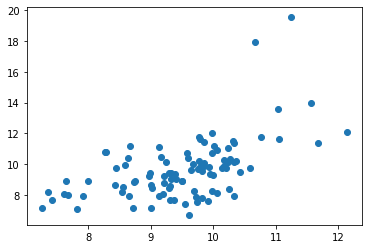

In [47]:
plt.scatter(y_pred, y_test)

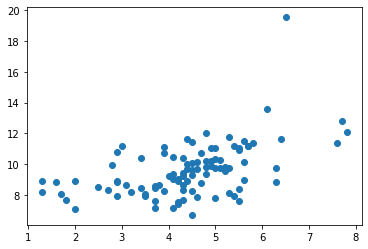

In [48]:
plt.scatter(x_train.iloc[:,0], y_train)

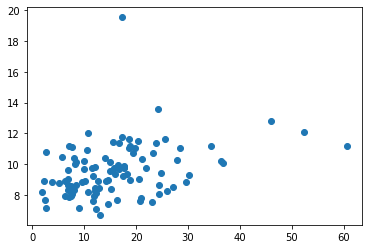

In [49]:
plt.scatter(x_train.iloc[:,1], y_train)

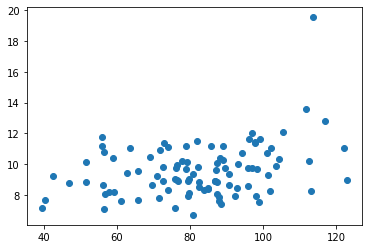

In [50]:
plt.scatter(x_train.iloc[:,2], y_train)